<a href="https://colab.research.google.com/github/ikyath/RNN_Introduction_Fundamentals/blob/master/RNN_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


Time Series

A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data











Example - Weather

Weather is a dynamical System

  See : Chaos Theory,Butterfly effect

![alt text](https://i.ytimg.com/vi/D6jln7pqn70/maxresdefault.jpg)

This is that even if we have the exact deterministic equations to describe a weather system our forecast will still become more and more incorrect.

The further into the future we try to predict that's pretty counterintuitive because you would think if you have the exact equation for something then you should be able to calculate all the future values precisely but due to the butterfly effect this is not actually true.

As the saying goes a butterfly flapping its wings in Tokyo can cause a tornado in America.

Small and decisions like numerical round off error and your computer will ultimately lead it to your weather forecast being completely wrong eventually.This is actually really relevant to us because when you think of time series and our own ends you automatically

![alt text](https://media.graytvinc.com/images/810*455/lnk+wx1.jpg)






















Another type of Sequential data is Text but in machine learning we don't consider it as sequence

Forecasting is about to predict the next values in a timeseries

# RNNs



*  The brain consists of billion of neurons, without any single duration.
*  A Decision made now is not only based only on what you hear/see now.
*  We can think and reason based on past inputs.
*  What happens if we add feedback loops and memory to neural network.









Traditional neural networks can’t do this, and it seems like a major shortcoming. For example, imagine you want to classify what kind of event is happening at every point in a movie. It’s unclear how a traditional neural network could use its reasoning about previous events in the film to inform later ones.

# LSTMs

# GRUs



GRUs are imporved version of standard recurrent neural networks also defined as RNNs which have gated mechanism.
*  It was introduced by Kyunghyun Cho in 2014. [Refer Here](https://arxiv.org/abs/1406.1078)
*  The GRU is like a long short-term memory (LSTM) with forget gate but has fewer parameters than LSTM, as it lacks an output gate.
*   The GRU is the newer generation of Recurrent Neural networks and is pretty similar to an LSTM. GRU’s got rid of the cell state and used the hidden state to transfer information. It also only has two gates, a reset gate and update gate.











#### Architecture of GRUs

![alt text](https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png)

Update Gate : First, we have the Update gate. This gate decides what information should be thrown away or kept. Information from the previous hidden state and information from the current input is passed through the sigmoid function. Values come out between 0 and 1. The closer to 0 means to forget, and the closer to 1 means to keep.

Reset Gate :
The reset gate is another gate is used to decide how much past information to forget.

#Stocks predictions using LSTM


We will import stocks history data using AlphaVantage API

We will import all necessary libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

Using TensorFlow backend.


We will use AlphaVanatage API for getting complete daily stocks of aaple

In [0]:
#!pip install alpha-vantage - #Please run this to install alpha vantage

In [24]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
ts = TimeSeries(key='5W7LO5BBKDO63VCC', output_format='pandas',indexing_type='integer')
data_set, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')
print(data_set.shape)

(5031, 6)


In [25]:
data_set.tail()

,index,1. open,2. high,3. low,4. close,5. volume
index,,,,,,
5026,2000-04-19,126.19,130.25,119.75,121.12,4644200.0
5027,2000-04-18,123.50,126.87,119.37,126.87,3490400.0
5028,2000-04-17,109.50,123.94,109.06,123.87,3656800.0
5029,2000-04-14,109.31,118.00,109.00,111.87,5960900.0
5030,2000-04-13,111.50,120.00,108.50,113.81,4730600.0


##### Lets Visualize the Apple stocks data

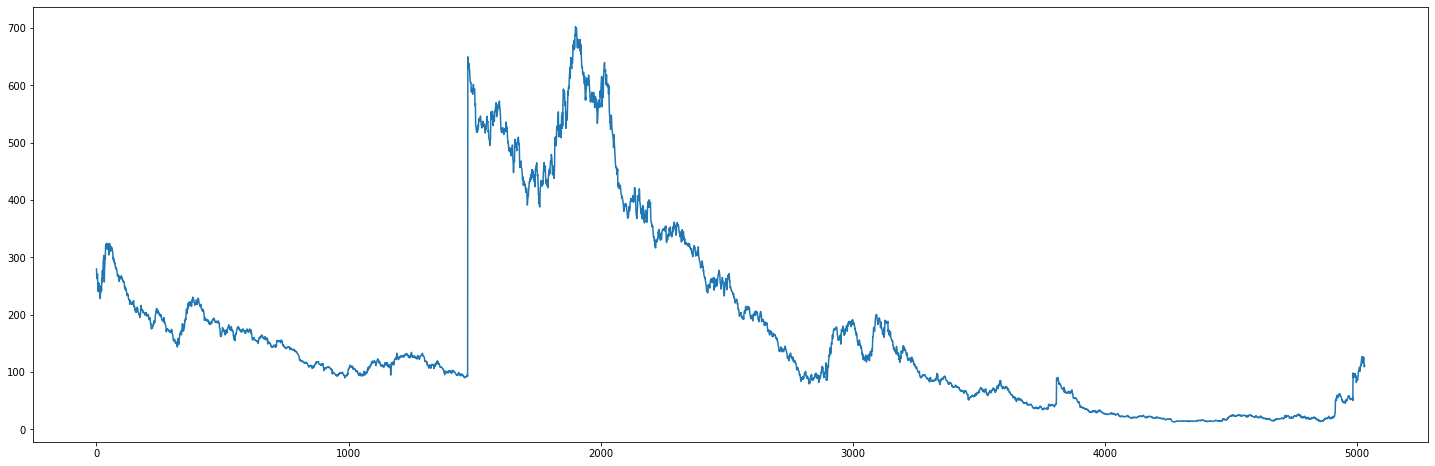

In [26]:
plt.figure(figsize=(25,8))
plt.plot(data_set['1. open'])
plt.show()

Above is the complete apple stocks data from 2000 to 2019 

Lets change the order of data in increasing order of date

In [0]:
dataset_sorted = data_set.iloc[::-1]

In [28]:
dataset_sorted.head()

,index,1. open,2. high,3. low,4. close,5. volume
index,,,,,,
5030,2000-04-13,111.50,120.00,108.50,113.81,4730600.0
5029,2000-04-14,109.31,118.00,109.00,111.87,5960900.0
5028,2000-04-17,109.50,123.94,109.06,123.87,3656800.0
5027,2000-04-18,123.50,126.87,119.37,126.87,3490400.0
5026,2000-04-19,126.19,130.25,119.75,121.12,4644200.0


In [0]:
#Lets split into train and test dataset

In [0]:
dataset_train = dataset_sorted.iloc[:4971,:]

In [34]:
dataset_train.shape

(4971, 6)

In [0]:
dataset_test = dataset_sorted.iloc[-60:,:]

In [35]:
dataset_test.shape

(60, 6)

In [0]:
train = dataset_train.iloc[:,1:2].values #Lets seperate open column and converting to numpy array

In [37]:
train[:10]

array([[111.5 ],
       [109.31],
       [109.5 ],
       [123.5 ],
       [126.19],
       [123.69],
       [115.  ],
       [122.12],
       [126.62],
       [117.19]])

In [38]:
train.shape

(4971, 1)

###### Normalization

In [0]:
scale = MinMaxScaler(feature_range=(0,1))

In [0]:
train_scaled = scale.fit_transform(train)

In [42]:
train_scaled[:10]

array([[0.14288822],
       [0.13971164],
       [0.13998724],
       [0.16029416],
       [0.16419599],
       [0.16056975],
       [0.14796496],
       [0.15829248],
       [0.1648197 ],
       [0.15114154]])

Creating a datastructure with 120 timestamps

In [0]:
X_train = []
y_train = []
for i in range(120,4971):
    X_train.append(train_scaled[i-120:i,0])
    y_train.append(train_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [0]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

LSTM Model

In [0]:
regressor = Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [47]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 120, 50)           10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 120, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120, 50)           20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 120, 50)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [0]:
regressor.compile(optimizer='RMSProp',loss='mean_squared_error')

In [0]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

# References

https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21